In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d

In [2]:
df=pd.read_csv(r'C:\Users\Geetha KK\Documents\python folder\superstore.csv',encoding='windows-1252')
#The file has some characters with specific encoding so we will use encoding='windows-1252'

In [3]:
df.shape

(9994, 21)

In [4]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [7]:
df['Order Date']=pd.to_datetime(df['Order Date'])
df['Ship Date']=pd.to_datetime(df['Ship Date'])


In [8]:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [9]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
df=df.drop('Row ID',axis=1)

In [11]:
df['Country'].value_counts()

Country
United States    9994
Name: count, dtype: int64

In [12]:
df=df.drop('Country',axis=1)

In [13]:
df['Category'].nunique()

3

In [14]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [15]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [16]:
df['Sub-Category'].nunique()

17

In [17]:
df['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [18]:
df['Sub-Category'].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

In [19]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# BAR PLOT

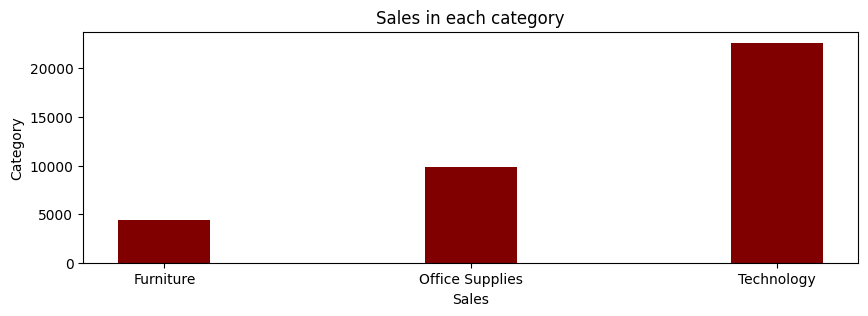

In [20]:
plt.figure(figsize=(10,3))
plt.bar('Category','Sales', color='maroon',data=df, align='center',width=0.3)
plt.xlabel('Sales')
plt.ylabel('Category')
plt.title('Sales in each category')
plt.show()

##### Technology has the highest Sales in the client data.

<Figure size 4000x4000 with 0 Axes>

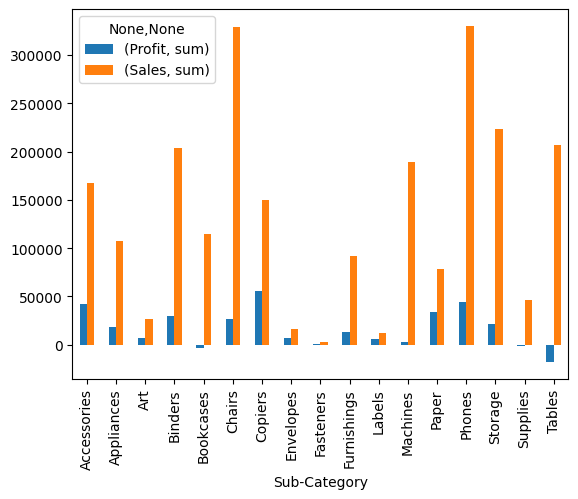

In [21]:
plt.figure(figsize=(40,40))
df.groupby('Sub-Category')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.show()

##### Phones and Chairs have the highest Sales but the profit they retain comparatively is quite lower. Meanwhile Copiers have higher profit compared to its sales, it has been sold less but made a remarkable profit.

In [22]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

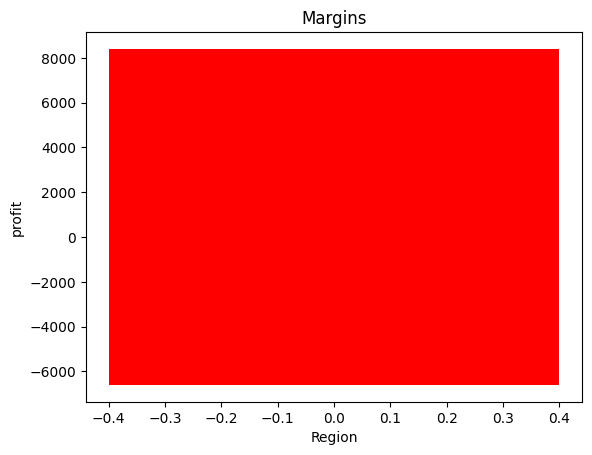

In [23]:
x=df['Profit']
plt.bar('Region'=='South',x,data=df,color='red')
plt.ylabel('profit')
plt.xlabel('Region')
plt.title('Margins')
plt.show()

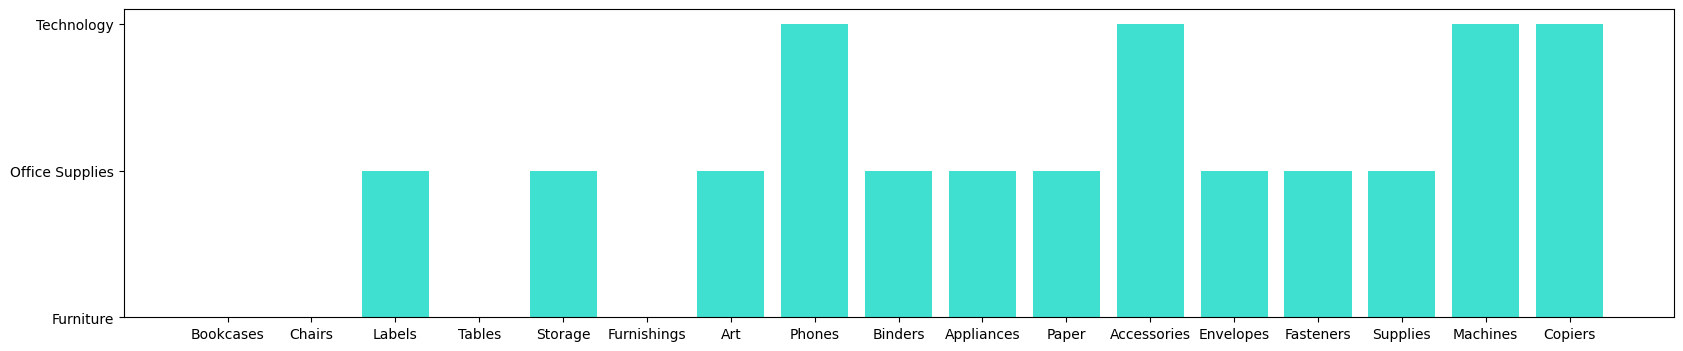

In [24]:
plt.figure(figsize=(20,4))
plt.bar('Sub-Category','Category',data=df,color='turquoise')
plt.show()

##### Sub Category and Category plot is plotted above 

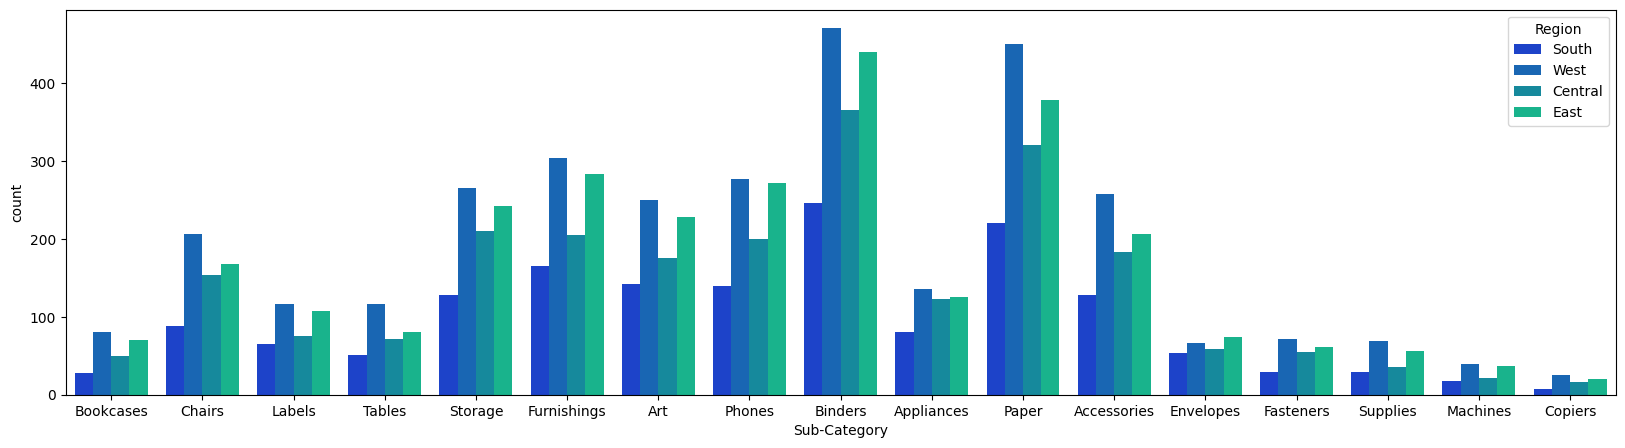

In [25]:
plt.figure(figsize=(20,5))
sns.countplot(x='Sub-Category',hue='Region',data=df,palette='winter')
plt.show()

##### Supply of binders are high in all the regions, followed by the sales of paper, whereas the supply of copiers is the least, as depicted earlier.

# PIE CHART

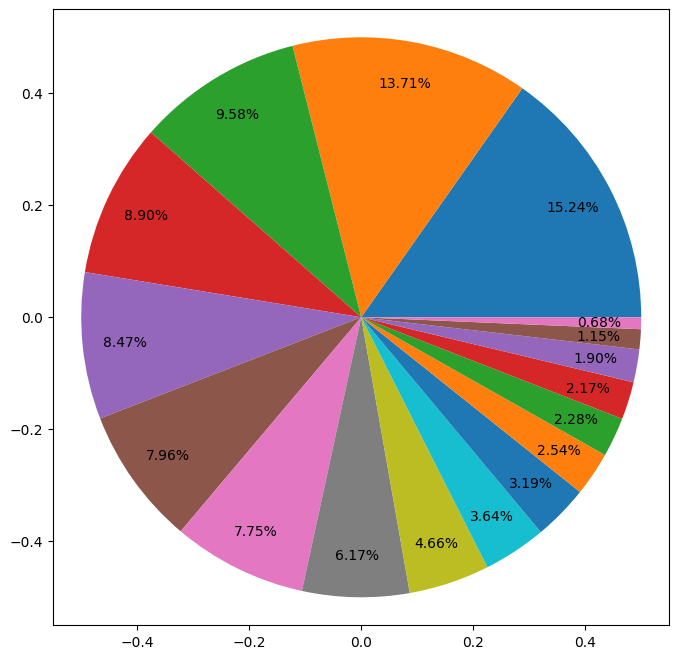

In [26]:
plt.figure(figsize=(8,8))
plt.pie(df['Sub-Category'].value_counts(),radius=0.5,shadow=False,autopct='%0.2f%%',frame=True,pctdistance=0.85)
plt.show()

In [27]:
df['Cost']=df['Sales']-df['Profit']
df['Cost'].head(8)

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
5      34.6906
6       5.3144
7     816.4368
Name: Cost, dtype: float64

In [28]:
df['Profit %']=(df['Profit']/df['Cost'])*100

In [29]:
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,Profit %
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,220.0464,19.047619


In [30]:
df.iloc[[1,2,3,4,8],[14,20]]
# 14th column is product name and 20th column is profit%

,Product Name,Profit %
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",42.857143
2,Self-Adhesive Address Labels for Typewriters b...,88.679245
3,Bretford CR4500 Series Slim Rectangular Table,-28.571429
4,Eldon Fold 'N Roll Cart System,12.676056
8,DXL Angle-View Binders with Locking Rings by S...,45.454545


In [31]:
df.sort_values(['Quantity'],ascending=True).head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,Profit %
4996,CA-2017-155824,2017-03-10,2017-03-15,Standard Class,KS-16300,Karen Seio,Corporate,Raleigh,North Carolina,27604,...,OFF-AP-10000390,Office Supplies,Appliances,Euro Pro Shark Stick Mini Vacuum,48.784,1,0.2,3.6588,45.1252,8.108108
6310,CA-2016-163328,2016-11-04,2016-11-06,Second Class,TP-21565,Tracy Poddar,Corporate,Eugene,Oregon,97405,...,OFF-PA-10000176,Office Supplies,Paper,Xerox 1887,15.176,1,0.2,5.3116,9.8644,53.846154


In [32]:
df.sort_values(['Profit %', 'Product Name'],ascending=False).groupby(['Profit %']).head(2)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,CA-2015-156335,2015-09-25,2015-09-28,Second Class,PO-19195,Phillina Ober,Home Office,Bayonne,New Jersey,7002,...,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,104.980,2,0.0,52.4900,52.4900,100.000000
4611,CA-2016-109407,2016-01-24,2016-01-26,Second Class,HG-14965,Henry Goldwyn,Corporate,Gulfport,Mississippi,39503,...,OFF-BI-10000285,Office Supplies,Binders,XtraLife ClearVue Slant-D Ring Binders by Card...,31.360,4,0.0,15.6800,15.6800,100.000000
8422,CA-2017-150091,2017-10-12,2017-10-16,Standard Class,NP-18670,Nora Paige,Consumer,Lakewood,New Jersey,8701,...,OFF-FA-10000621,Office Supplies,Fasteners,"OIC Colored Binder Clips, Assorted Sizes",17.900,5,0.0,8.7710,9.1290,96.078431
9336,CA-2017-130715,2017-09-16,2017-09-20,Standard Class,CY-12745,Craig Yedwab,Corporate,San Francisco,California,94110,...,OFF-FA-10000621,Office Supplies,Fasteners,"OIC Colored Binder Clips, Assorted Sizes",17.900,5,0.0,8.7710,9.1290,96.078431
888,CA-2014-104976,2014-12-09,2014-12-16,Standard Class,CK-12760,Cyma Kinney,Corporate,San Francisco,California,94122,...,OFF-PA-10003845,Office Supplies,Paper,Xerox 1987,34.680,6,0.0,16.9932,17.6868,96.078431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,US-2016-144057,2016-05-09,2016-05-13,Standard Class,CV-12805,Cynthia Voltz,Corporate,Austin,Texas,78745,...,OFF-AP-10000390,Office Supplies,Appliances,Euro Pro Shark Stick Mini Vacuum,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,CA-2015-107083,2015-11-21,2015-11-27,Standard Class,BB-11545,Brenda Bowman,Corporate,Fort Worth,Texas,76106,...,OFF-AP-10004136,Office Supplies,Appliances,Kensington 6 Outlet SmartSocket Surge Protector,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,CA-2015-164007,2015-06-08,2015-06-12,Standard Class,MG-17695,Maureen Gnade,Consumer,Chicago,Illinois,60610,...,OFF-AP-10003849,Office Supplies,Appliances,Hoover Shoulder Vac Commercial Portable Vacuum,143.128,2,0.8,-393.6020,536.7300,-73.333333
676,US-2017-119438,2017-03-18,2017-03-23,Standard Class,CD-11980,Carol Darley,Consumer,Tyler,Texas,75701,...,OFF-AP-10000804,Office Supplies,Appliances,Hoover Portapower Portable Vacuum,2.688,3,0.8,-7.3920,10.0800,-73.333333


### Data wrt customer

In [33]:
top_15=df['Customer Name'].value_counts().head(15)

In [34]:
top_15

Customer Name
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
Seth Vernon            32
Jonathan Doherty       32
Edward Hooks           32
Zuschuss Carroll       31
Emily Phan             31
Arthur Prichep         31
Lena Cacioppo          30
Sally Hughsby          29
Dean percer            29
Brian Moss             29
Name: count, dtype: int64

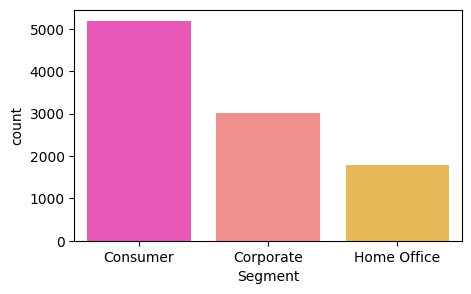

In [35]:
plt.figure(figsize=(5,3))
s=sns.countplot(x='Segment',data=df, palette='spring')

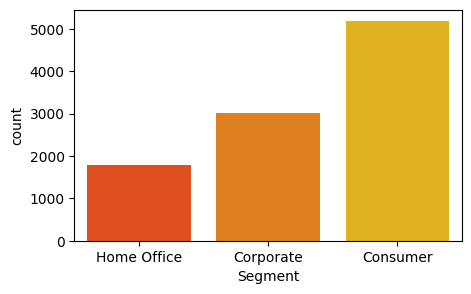

In [36]:
plt.figure(figsize=(5,3))
s=sns.countplot(x=df['Segment'],data=df,order=df['Segment'].value_counts(ascending=True).index,palette='autumn')
#arranging them in ascending order by the count of the segment


[Text(0, 0, '1783'), Text(0, 0, '3020'), Text(0, 0, '5191')]

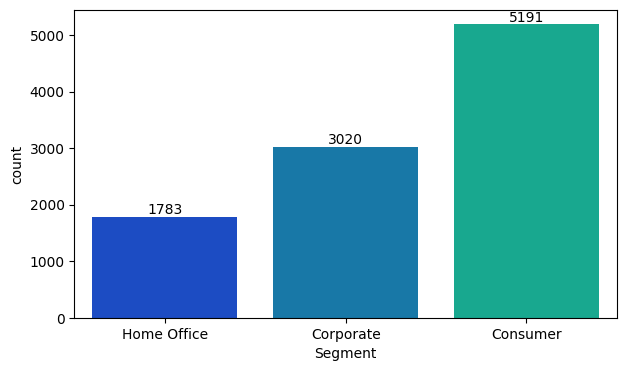

In [37]:
plt.figure(figsize=(7,4))
s=sns.countplot(x=df['Segment'],data=df,order=df['Segment'].value_counts(ascending=True).index,palette='winter')
d=df['Segment'].value_counts(ascending=True).values
s.bar_label(container=s.containers[0],labels=d)


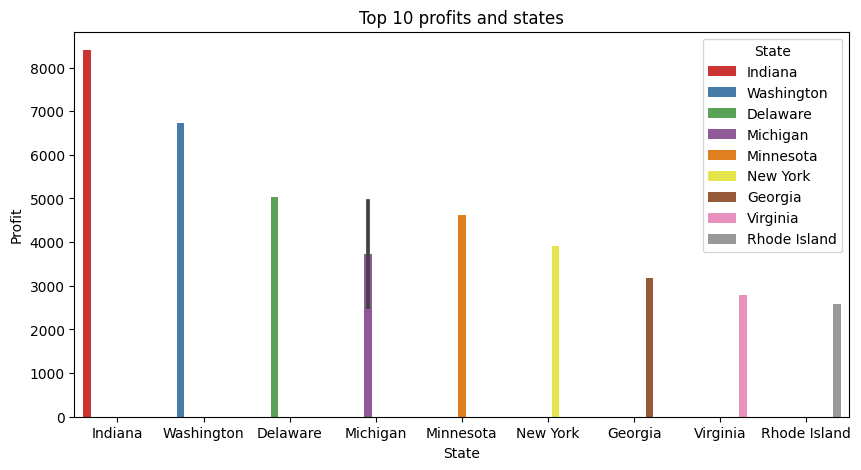

In [38]:
plt.figure(figsize=(10,5))
top10=df.sort_values(['Profit'],ascending=False).head(10)
s=sns.barplot(x='State', y='Profit',hue='State',palette='Set1', data= top10)
s.set_xlabel('State')
s.set_title('Top 10 profits and states')
plt.show()

##### Indiana has the highest profit whereas Rode Island makes the lowest profit of all

## Order Details of data

In [39]:
df['Shipment Duration']=(df['Ship Date']-df['Order Date']).dt.days
df['Shipment Duration']

0       3
1       3
2       4
3       7
4       7
       ..
9989    2
9990    5
9991    5
9992    5
9993    5
Name: Shipment Duration, Length: 9994, dtype: int64

In [40]:
df.iloc[:,[0,3,21]]

,Order ID,Ship Mode,Shipment Duration
0,CA-2016-152156,Second Class,3
1,CA-2016-152156,Second Class,3
2,CA-2016-138688,Second Class,4
3,US-2015-108966,Standard Class,7
4,US-2015-108966,Standard Class,7
...,...,...,...
9989,CA-2014-110422,Second Class,2
9990,CA-2017-121258,Standard Class,5
9991,CA-2017-121258,Standard Class,5
9992,CA-2017-121258,Standard Class,5


In [41]:
def agg_customer(x):
    d = []
    d.append(x['Order ID'].count())
    d.append(x['Sales'].sum())
    d.append(x['Profit %'].mean())
    d.append((x['Order Date']).min())
    d.append((x['Order Date']).max())
    d.append(x['Product Name'].unique())
    d.append(x['City'].unique())
    return pd.Series(d, index=['#Purchases','Total_Sales','Average Profit % gained','First_Purchase_Date','Latest_Purchase_Date','Products Purchased','Location_Count'])

In [42]:
df_agg = df.groupby('Customer ID').apply(agg_customer)
df_agg.head(4)

,#Purchases,Total_Sales,Average Profit % gained,First_Purchase_Date,Latest_Purchase_Date,Products Purchased,Location_Count
Customer ID,,,,,,,
AA-10315,11,5563.560,44.527461,2014-03-31,2017-06-29,"[Belkin 325VA UPS Surge Protector, 6', Avery B...","[Minneapolis, San Francisco, Round Rock, New Y..."
AA-10375,15,1056.390,52.349415,2014-04-21,2017-12-11,"[Sterilite Officeware Hinged File Box, Colored...","[Mesa, Omaha, Los Angeles, Salem, Atlanta, Ran..."
AA-10480,12,1790.512,55.580242,2014-05-04,2017-04-15,"[Xerox 1967, DAX Wood Document Frame, Strathmo...","[Concord, Middletown, Springfield, Detroit]"
AA-10645,18,5086.935,42.364755,2014-06-22,2017-11-05,"[Padded Folding Chairs, Black, 4/Carton, Panas...","[Chester, San Francisco, Georgetown, San Diego..."


In [43]:
df['order year']=df['Order Date'].dt.year
df['order year'].head()
#extracting date

0    2016
1    2016
2    2016
3    2015
4    2015
Name: order year, dtype: int32

Text(0.5, 1.0, 'Year wise Total Sales & % of profit gained')

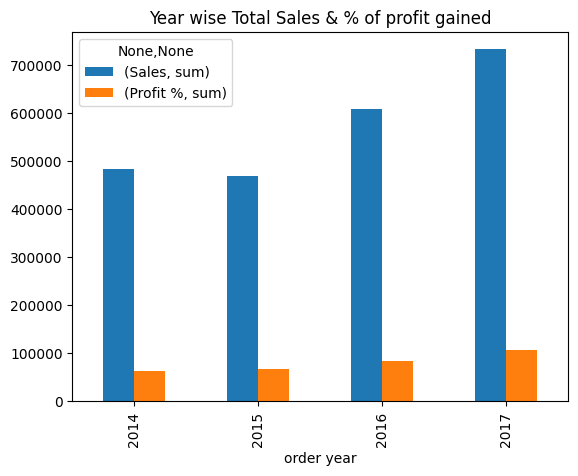

In [44]:
df.groupby('order year')[['Sales','Profit %']].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales & % of profit gained')

##### early profit and sales are increasing, which is a good margin for a firm.

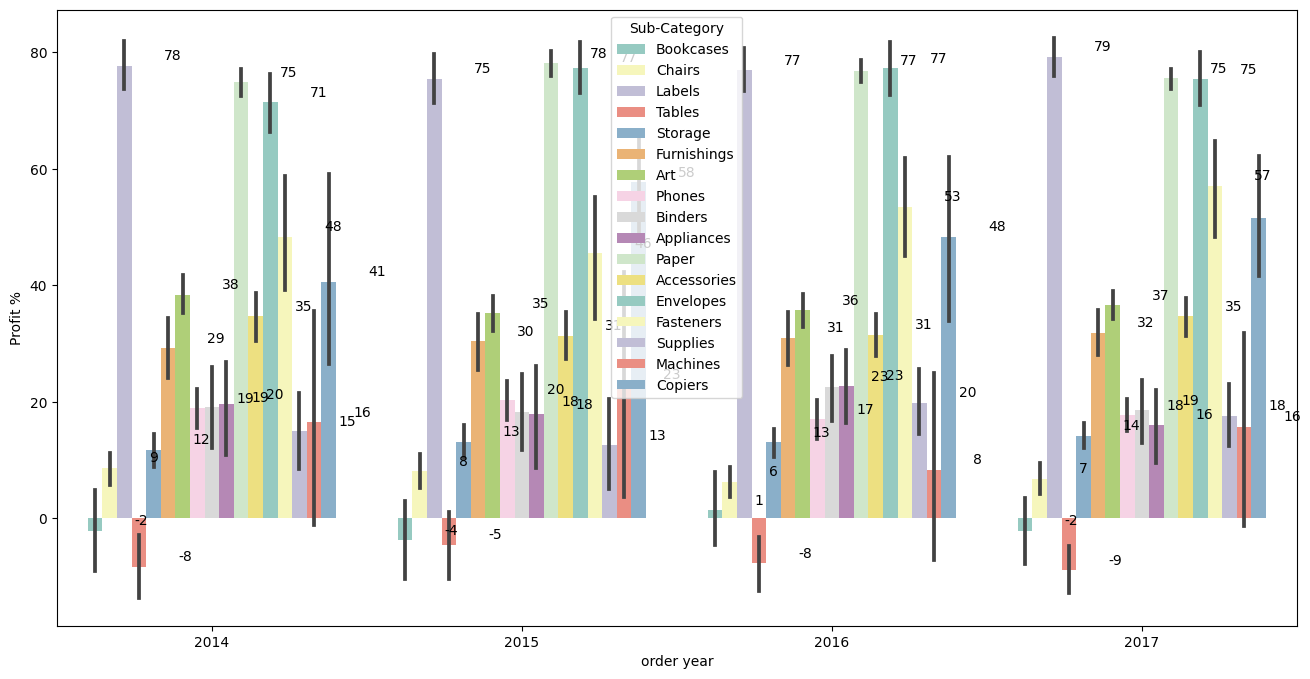

In [46]:
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot(data=df,x='order year',y='Profit %',hue='Sub-Category',palette='Set3')
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.show()

##### Tables always incurred a loss in all the years, meanwhile Bookcases incurred loss in all the years except 2016. 